**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [15]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [16]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [17]:
import numpy as np
from scipy.optimize import minimize

# Define parameters
A = 1.0
gamma = 0.5
alpha = 0.3
nu = 1.0
epsilon = 2.0
tau = 0.0
T = 0.0
w = 1.0

# Define the optimal firm behavior functions
def ell_star(p, w, A, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def y_star(ell, A, gamma):
    return A * ell ** gamma

def pi_star(p, w, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

# Define the utility function and constraints for the consumer
def utility(ell, c1, c2, alpha, nu, epsilon):
    return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (ell ** (1 + epsilon) / (1 + epsilon))

def consumption(ell, p1, p2, w, T, A, gamma, alpha):
    pi1 = pi_star(p1, w, A, gamma)
    pi2 = pi_star(p2, w, A, gamma)
    income = w * ell + T + pi1 + pi2
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

# Define the functions to check market clearing conditions for goods
def market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon):
    p1, p2 = prices
    
    # Calculate optimal labor supply from both firms
    ell1 = ell_star(p1, w, A, gamma)
    ell2 = ell_star(p2, w, A, gamma)
    ell_total = ell1 + ell2

    # Calculate consumption and production quantities
    y1 = y_star(ell1, A, gamma)
    y2 = y_star(ell2, A, gamma)
    
    # Calculate consumer's optimal labor supply and resulting consumption
    def consumer_utility_max(ell):
        c1, c2 = consumption(ell, p1, p2, w, T, A, gamma, alpha)
        return -utility(ell, c1, c2, alpha, nu, epsilon)
    
    result = minimize(consumer_utility_max, x0=0.1, bounds=[(0, None)])
    ell_star_opt = result.x[0]
    c1_star, c2_star = consumption(ell_star_opt, p1, p2, w, T, A, gamma, alpha)
    
    # Check market clearing conditions
    labor_market_clearing = ell_star_opt - ell_total  # Total labor supplied by consumer should match total labor demanded by firms
    good_market_1_clearing = c1_star - y1
    good_market_2_clearing = c2_star - y2
    
    return [labor_market_clearing, good_market_1_clearing, good_market_2_clearing]

# Define the ranges for p1 and p2
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions for each combination of prices
for p1 in p1_range:
    for p2 in p2_range:
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        print(f"Prices: p1 = {p1:.2f}, p2 = {p2:.2f}")
        print(f"Labor market clearing: {clearing_conditions[0]:.6f}")
        print(f"Good market 1 clearing: {clearing_conditions[1]:.6f}")
        print(f"Good market 2 clearing: {clearing_conditions[2]:.6f}")
        print()


Prices: p1 = 0.10, p2 = 0.10
Labor market clearing: 0.993337
Good market 1 clearing: 2.960010
Good market 2 clearing: 6.973358

Prices: p1 = 0.10, p2 = 0.31
Labor market clearing: 0.964483
Good market 1 clearing: 3.003635
Good market 2 clearing: 2.134671

Prices: p1 = 0.10, p2 = 0.52
Labor market clearing: 0.906311
Good market 1 clearing: 3.093006
Good market 2 clearing: 1.143211

Prices: p1 = 0.10, p2 = 0.73
Labor market clearing: 0.819428
Good market 1 clearing: 3.229950
Good market 2 clearing: 0.676954

Prices: p1 = 0.10, p2 = 0.94
Labor market clearing: 0.704710
Good market 1 clearing: 3.417092
Good market 2 clearing: 0.384353

Prices: p1 = 0.10, p2 = 1.16
Labor market clearing: 0.563205
Good market 1 clearing: 3.657579
Good market 2 clearing: 0.170868

Prices: p1 = 0.10, p2 = 1.37
Labor market clearing: 0.396060
Good market 1 clearing: 3.954847
Good market 2 clearing: 0.000421

Prices: p1 = 0.10, p2 = 1.58
Labor market clearing: 0.204431
Good market 1 clearing: 4.312367
Good marke

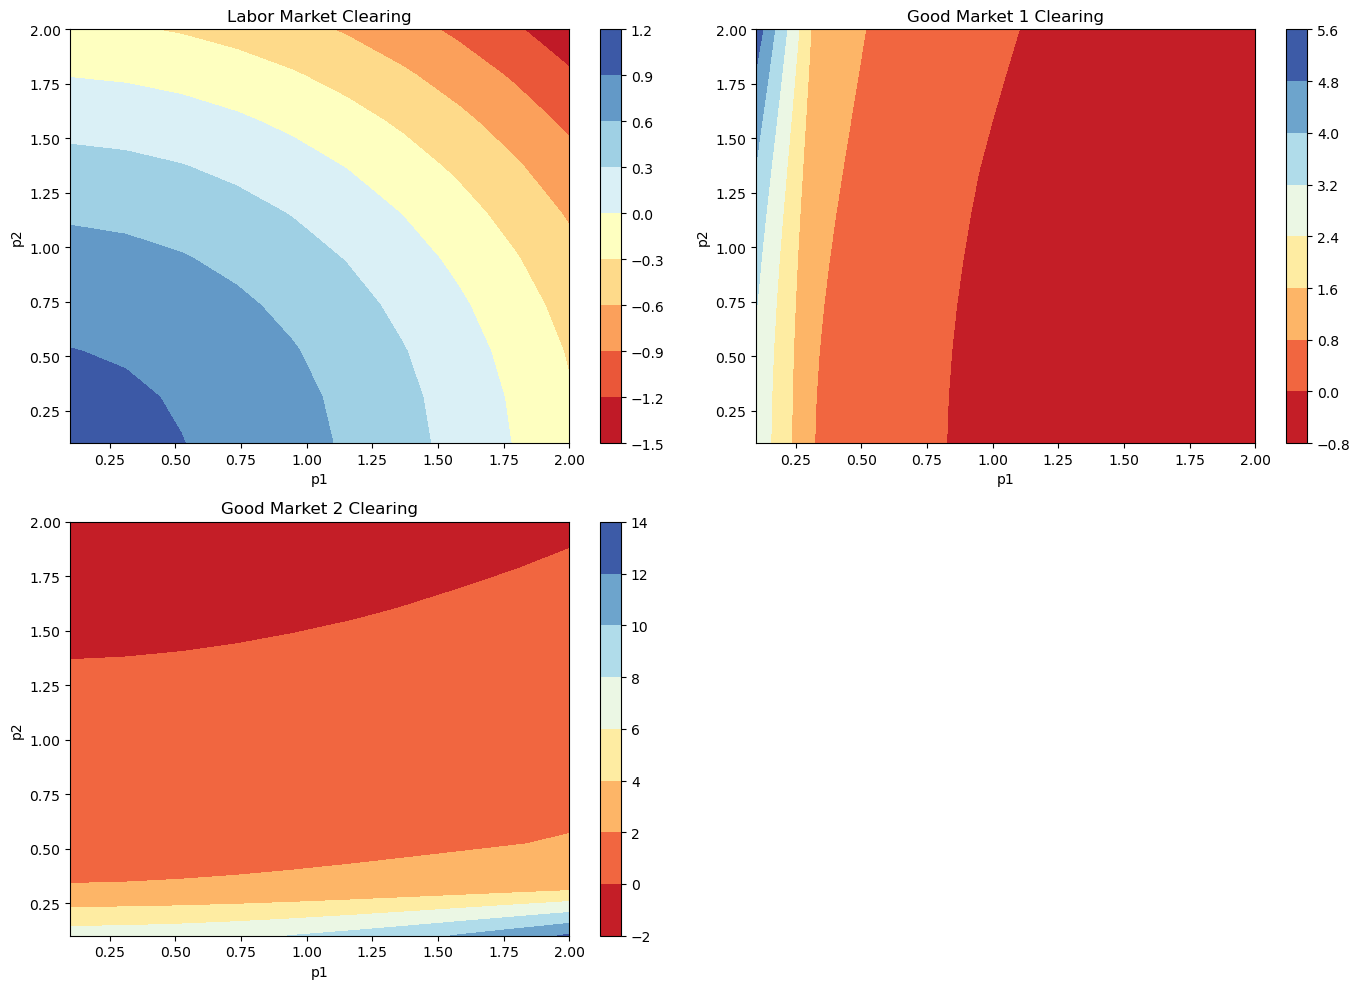

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define parameters
A = 1.0
gamma = 0.5
alpha = 0.3
nu = 1.0
epsilon = 2.0
tau = 0.0
T = 0.0
w = 1.0  # Set numeraire as w = 1

# Define the optimal firm behavior functions
def ell_star(p, w, A, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def y_star(ell, A, gamma):
    return A * ell ** gamma

def pi_star(p, w, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

# Define the utility function and constraints for the consumer
def utility(ell, c1, c2, alpha, nu, epsilon):
    return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (ell ** (1 + epsilon) / (1 + epsilon))

def consumption(ell, p1, p2, w, T, A, gamma, alpha):
    pi1 = pi_star(p1, w, A, gamma)
    pi2 = pi_star(p2, w, A, gamma)
    income = w * ell + T + pi1 + pi2
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

# Define the functions to check market clearing conditions for goods
def market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon):
    p1, p2 = prices
    
    # Calculate optimal labor supply from both firms
    ell1 = ell_star(p1, w, A, gamma)
    ell2 = ell_star(p2, w, A, gamma)
    ell_total = ell1 + ell2

    # Calculate consumption and production quantities
    y1 = y_star(ell1, A, gamma)
    y2 = y_star(ell2, A, gamma)
    
    # Calculate consumer's optimal labor supply and resulting consumption
    def consumer_utility_max(ell):
        c1, c2 = consumption(ell, p1, p2, w, T, A, gamma, alpha)
        return -utility(ell, c1, c2, alpha, nu, epsilon)
    
    result = minimize(consumer_utility_max, x0=0.1, bounds=[(0, None)])
    ell_star_opt = result.x[0]
    c1_star, c2_star = consumption(ell_star_opt, p1, p2, w, T, A, gamma, alpha)
    
    # Check market clearing conditions
    labor_market_clearing = ell_star_opt - ell_total  # Total labor supplied by consumer should match total labor demanded by firms
    good_market_1_clearing = c1_star - y1
    good_market_2_clearing = c2_star - y2
    
    return [labor_market_clearing, good_market_1_clearing, good_market_2_clearing]

# Define the ranges for p1 and p2 using linspace
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Initialize arrays to store results
labor_market_clearing_results = np.zeros((len(p1_range), len(p2_range)))
good_market_1_clearing_results = np.zeros((len(p1_range), len(p2_range)))
good_market_2_clearing_results = np.zeros((len(p1_range), len(p2_range)))

# Compute market clearing conditions for each combination of prices
for i, p1 in enumerate(p1_range):
    for j, p2 in enumerate(p2_range):
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        labor_market_clearing_results[i, j] = clearing_conditions[0]
        good_market_1_clearing_results[i, j] = clearing_conditions[1]
        good_market_2_clearing_results[i, j] = clearing_conditions[2]

# Plotting market clearing conditions
plt.figure(figsize=(14, 10))

# Plot for labor market clearing
plt.subplot(2, 2, 1)
plt.contourf(p1_range, p2_range, labor_market_clearing_results.T, cmap='RdYlBu')
plt.colorbar()
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Labor Market Clearing')

# Plot for good market 1 clearing
plt.subplot(2, 2, 2)
plt.contourf(p1_range, p2_range, good_market_1_clearing_results.T, cmap='RdYlBu')
plt.colorbar()
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Good Market 1 Clearing')

# Plot for good market 2 clearing
plt.subplot(2, 2, 3)
plt.contourf(p1_range, p2_range, good_market_2_clearing_results.T, cmap='RdYlBu')
plt.colorbar()
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Good Market 2 Clearing')

plt.tight_layout()
plt.show()


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [19]:
import numpy as np
from scipy.optimize import minimize

# Define the optimal firm behavior functions
def ell_star(p, w, A, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def y_star(ell, A, gamma):
    return A * ell ** gamma

def pi_star(p, w, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

# Define the utility function and constraints for the consumer
def utility(ell, c1, c2, alpha, nu, epsilon):
    return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (ell ** (1 + epsilon) / (1 + epsilon))

def consumption(ell, p1, p2, w, T, A, gamma, alpha):
    pi1 = pi_star(p1, w, A, gamma)
    pi2 = pi_star(p2, w, A, gamma)
    income = w * ell + T + pi1 + pi2
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

# Define the functions to check market clearing conditions for labor and good market 1
def market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon):
    p1, p2 = prices
    
    # Calculate optimal labor supply from both firms
    ell1 = ell_star(p1, w, A, gamma)
    ell2 = ell_star(p2, w, A, gamma)
    ell_total = ell1 + ell2

    # Calculate consumption and production quantities
    y1 = y_star(ell1, A, gamma)
    y2 = y_star(ell2, A, gamma)
    
    # Calculate consumer's optimal labor supply and resulting consumption
    def consumer_utility_max(ell):
        c1, c2 = consumption(ell, p1, p2, w, T, A, gamma, alpha)
        return -utility(ell, c1, c2, alpha, nu, epsilon)
    
    result = minimize(consumer_utility_max, x0=0.1, bounds=[(0, None)])
    ell_star_opt = result.x[0]
    c1_star, c2_star = consumption(ell_star_opt, p1, p2, w, T, A, gamma, alpha)
    
    # Check market clearing conditions
    labor_market_clearing = ell_star_opt - ell_total  # Total labor supplied by consumer should match total labor demanded by firms
    good_market_1_clearing = c1_star - y1
    
    return [labor_market_clearing, good_market_1_clearing]

# Define the ranges for p1 and p2
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Initialize arrays to store results
market_clearing_results = np.zeros((len(p1_range), len(p2_range)))

# Compute market clearing conditions for each combination of prices
for i, p1 in enumerate(p1_range):
    for j, p2 in enumerate(p2_range):
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        market_clearing_results[i, j] = np.sum(np.abs(clearing_conditions))

# Find the indices of the minimum value in the market clearing results
min_indices = np.unravel_index(np.argmin(market_clearing_results), market_clearing_results.shape)

# Get the equilibrium prices p1 and p2
equilibrium_p1 = p1_range[min_indices[0]]
equilibrium_p2 = p2_range[min_indices[1]]

equilibrium_p1, equilibrium_p2





(0.9444444444444444, 1.577777777777778)

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [20]:
import numpy as np
from scipy.optimize import minimize

# Define parameters
A = 1.0
gamma = 0.5
alpha = 0.3
nu = 1.0
epsilon = 2.0
w = 1.0
kappa = 0.1  # Assuming kappa is defined somewhere in your code

# Define optimal firm behavior functions
def ell_star(p, w, A, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def pi_star(p, w, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

# Define utility function
def utility(c1, c2, alpha, nu, epsilon):
    return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (c2 ** (1 + epsilon) / (1 + epsilon))

# Define social welfare function
def social_welfare_function(params):
    tau, T = params
    
    # Example calculation of ell_star, pi1_star, pi2_star (replace with actual calculations)
    p1 = 1.0  # Example value, replace with appropriate values
    p2 = 1.0  # Example value, replace with appropriate values
    ell_star_value = ell_star(p1, w, A, gamma)
    pi1_star_value = pi_star(p1, w, A, gamma)
    pi2_star_value = pi_star(p2, w, A, gamma)
    
    # Calculate implied values
    c2_star = (1 - alpha) * (w * ell_star_value + T + pi1_star_value + pi2_star_value) / (p2 + tau)
    y2_star = A * ell_star_value ** gamma
    swf = utility(w * ell_star_value + T + pi1_star_value + pi2_star_value, c2_star, alpha, nu, epsilon) - kappa * y2_star
    
    return -swf  # Minimize the negative of the social welfare function to maximize SWF

# Define initial guess for tau and T
initial_guess = [0.0, 0.0]

# Set bounds for tau and T
bounds = [(0, 1.0), (0, 1.0)]  # Adjust the upper bounds to reasonable values

# Solve the optimization problem
result = minimize(social_welfare_function, initial_guess, bounds=bounds)

# Get the optimal values of tau and T
optimal_tau = result.x[0]
optimal_T = result.x[1]

print(f"Optimal tau: {optimal_tau:.6f}, Optimal T: {optimal_T:.6f}")



Optimal tau: 0.379654, Optimal T: 1.000000


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [21]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [22]:
import numpy as np
from types import SimpleNamespace

# Set the parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1, par.N + 1)
par.sigma = 2

par.v = np.array([1, 2, 3])
par.c = 1

# Simulate and calculate expected utility and average realized utility
expected_utility = np.zeros(par.J)
average_realized_utility = np.zeros(par.J)

for j in range(par.J):
    utility_sum = 0
    utility_f_sum = 0
    for k in range(par.K):
        utility = par.v[j] + np.random.normal(0, par.sigma)
        utility_sum += utility
        if k in par.F:
            utility_f_sum += utility
    expected_utility[j] = utility_sum / par.K
    average_realized_utility[j] = utility_f_sum / len(par.F)

expected_utility, average_realized_utility

(array([1.01022066, 1.9847776 , 2.96869732]),
 array([1.14907672, 2.18150055, 3.91171489]))

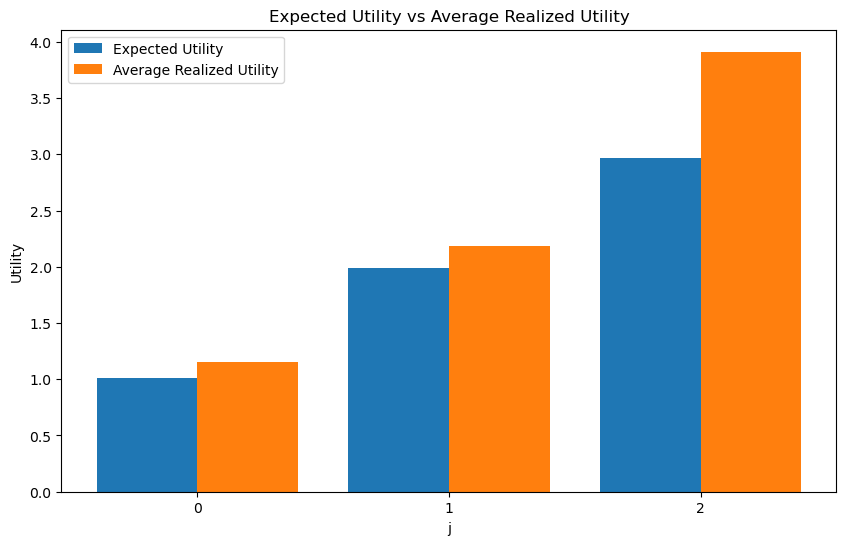

In [23]:
import matplotlib.pyplot as plt

# Create an array of the j values
j_values = np.arange(par.J)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(j_values - 0.2, expected_utility, 0.4, label='Expected Utility')
plt.bar(j_values + 0.2, average_realized_utility, 0.4, label='Average Realized Utility')

# Add labels and title
plt.xlabel('j')
plt.ylabel('Utility')
plt.title('Expected Utility vs Average Realized Utility')
plt.xticks(j_values)
plt.legend()

# Show the plot
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [24]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [25]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [26]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

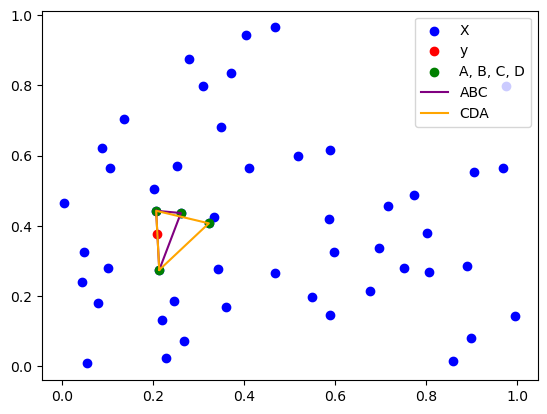

A: [0.20634391 0.44272557], B: [0.26071605 0.43635845], C: [0.21315735 0.274245  ], D: [0.32209779 0.40699871]
Barycentric coordinates with respect to ABC: (0.6134829803310216, 0.0008797864519075784, 0.3856372332170709)
Barycentric coordinates with respect to CDA: (0.3855821621027246, 0.00041649660997332384, 0.614001341287302)
The points and triangles have been successfully plotted.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def barycentric_coords(A, B, C, y):
    ABC = ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r1 = ((B[1] - C[1])*(y[0] - C[0]) + (C[0] - B[0])*(y[1] - C[1])) / ABC
    r2 = ((C[1] - A[1])*(y[0] - C[0]) + (A[0] - C[0])*(y[1] - C[1])) / ABC
    return r1, r2, 1 - r1 - r2

def find_points(X, y):
    distances = np.sum((X - y)**2, axis=1)
    return X[np.argsort(distances)[:4]]

rng = np.random.default_rng(2024)
X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))
A, B, C, D = find_points(X, y)
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)

def plot_points_and_triangles(X, y, A, B, C, D):
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='X')
    plt.scatter(y[0], y[1], color='red', label='y')
    plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], color='green', label='A, B, C, D')
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='purple', label='ABC')
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='orange', label='CDA')
    plt.legend()
    plt.show()

plot_points_and_triangles(X, y, A, B, C, D)
print(f"A: {A}, B: {B}, C: {C}, D: {D}")
print(f"Barycentric coordinates with respect to ABC: {r_ABC}")
print(f"Barycentric coordinates with respect to CDA: {r_CDA}")
print("The points and triangles have been successfully plotted.")

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [28]:
def is_inside_triangle(r):
    return all(0 <= ri <= 1 for ri in r)

# Compute barycentric coordinates for both triangles
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)

# Determine which triangle y is inside
inside_ABC = is_inside_triangle(r_ABC)
inside_CDA = is_inside_triangle(r_CDA)

if inside_ABC:
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    print("Point y is inside triangle CDA.")
else:
    print("Point y is not inside either triangle ABC or CDA.")

Point y is inside triangle ABC.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [29]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [30]:
# Define the function f
def f(x):
    return x[0]**2 + x[1]**2

# Compute the true value of f at y
true_value = f(y)

# Approximate f(y) using the average value of f at A, B, C, and D
approximation = (f(A) + f(B) + f(C) + f(D)) / 4

# Compare the approximation with the true value
print(f"True value of f(y): {true_value}")
print(f"Approximated value of f(y): {approximation}")
print(f"Difference: {abs(true_value - approximation)}")

True value of f(y): 0.18638229126607866
Approximated value of f(y): 0.22175165157803664
Difference: 0.035369360311957976


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [31]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [32]:
# Assuming Y is a set of points. Define Y if not already defined.
Y = rng.uniform(size=(10, 2))  # Example: 10 random points

# Initialize lists to store results
true_values = []
approximations = []
differences = []

# Loop over each point in Y
for y in Y:
    # Compute the true value of f at y
    true_value = f(y)
    true_values.append(true_value)
    
    # Find the closest points A, B, C, D to y in X
    A, B, C, D = find_points(X, y)
    
    # Approximate f(y) using the average value of f at A, B, C, and D
    approximation = (f(A) + f(B) + f(C) + f(D)) / 4
    approximations.append(approximation)
    
    # Compute the difference
    difference = abs(true_value - approximation)
    differences.append(difference)

# Summarize results
for i, y in enumerate(Y):
    print(f"Point {i+1}: y = {y}, True value = {true_values[i]}, Approximation = {approximations[i]}, Difference = {differences[i]}")

# Optionally, compute the average error
average_error = sum(differences) / len(differences)
print(f"Average error: {average_error}")

Point 1: y = [0.20754026 0.28412533], True value = 0.1238001641861283, Approximation = 0.124051897338949, Difference = 0.0002517331528207045
Point 2: y = [0.61324961 0.50546484], True value = 0.6315697900623941, Approximation = 0.6489141301774182, Difference = 0.01734434011502406
Point 3: y = [0.01961901 0.91673375], True value = 0.8407856754062666, Approximation = 0.6206059920570294, Difference = 0.2201796833492372
Point 4: y = [0.24682518 0.48578504], True value = 0.29690977823379294, Approximation = 0.2952803057160796, Difference = 0.0016294725177133373
Point 5: y = [0.12825964 0.3835261 ], True value = 0.16354280903023238, Approximation = 0.13903033926017594, Difference = 0.024512469770056444
Point 6: y = [0.7823282  0.23914789], True value = 0.6692291197651513, Approximation = 0.685256425111715, Difference = 0.016027305346563714
Point 7: y = [0.84455035 0.6140793 ], True value = 1.090358684585916, Approximation = 0.9852323893659476, Difference = 0.1051262952199683
Point 8: y = [0.